In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Reading the data

In [2]:
data = pd.read_csv("Fish.csv")
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


# Cleaning the data

In [4]:
# Checking for NA values
data.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [5]:
# Checking for zero values and dropping them
data[data.values == 0]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [6]:
data.drop([40], inplace = True)

# Predicting the weight using Polynomial Regression

In [7]:
# Plotting the variables that we are working with to make sure that Polynomial Regression is the right type to use.
x1 = data.iloc[:, 2]
x2 = data.iloc[:, 3]
x3 = data.iloc[:, 4]
x4 = data.iloc[:, 5]
x5 = data.iloc[:, 6]
y = data.iloc[:, 1]

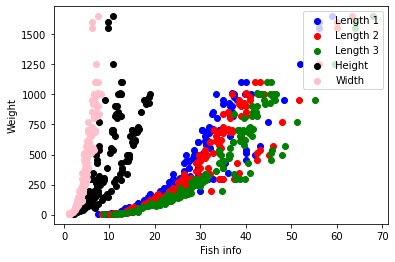

In [8]:
plt.scatter(x1,y, color = 'blue')
plt.scatter(x2,y, color = 'red')
plt.scatter(x3,y, color = 'green')
plt.scatter(x4,y, color = 'black')
plt.scatter(x5,y, color = 'pink')
plt.ylabel('Weight')
plt.xlabel('Fish info')
plt.legend(["Length 1","Length 2","Length 3","Height", "Width"], loc=1)
plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures

x = data.iloc[:, 2:]
y = data.iloc[:, 1]
poly = PolynomialFeatures(degree = 5)
x_poly = poly.fit_transform(x)

In [10]:
poly.fit(x_poly, y)
poly_reg = LinearRegression()
poly_reg.fit(x_poly, y)

LinearRegression()

In [11]:
score = poly_reg.score(x_poly,y) 
print(score)

0.9999377722170781
